<a href="https://colab.research.google.com/github/himanshigarg01/The-Sparks-Foundation-DSBA-/blob/main/GRIPJUNE21_TASK_3_Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE:** Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

**By:** Himanshi Garg

**Details:** ● As a business manager, try to find out the weak areas where you can work to make more profit.
● What all business problems you can derive by exploring the data?

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading the dataset
from google.colab import files
uploaded = files.upload()
import io
retail_data = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

Saving SampleSuperstore.csv to SampleSuperstore.csv


# **Analysis**

In [ ]:
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
retail_data.shape

(9994, 13)

In [ ]:
retail_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
retail_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
retail_data.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

In [ ]:
retail_data.nunique()   #data is of only one country i.e USA

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

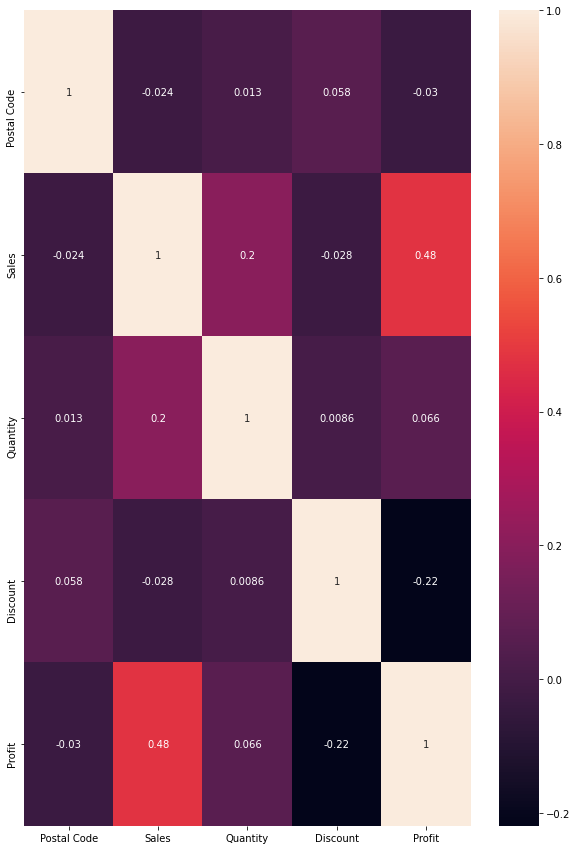

In [ ]:
plt.figure(figsize=(10,15))
sns.heatmap(retail_data.corr(),annot=True)
plt.show()

From heatmap, we see positive corr b/w Sales and Profit.
From heatmap, we see negative corr b/w Profit and Discount.

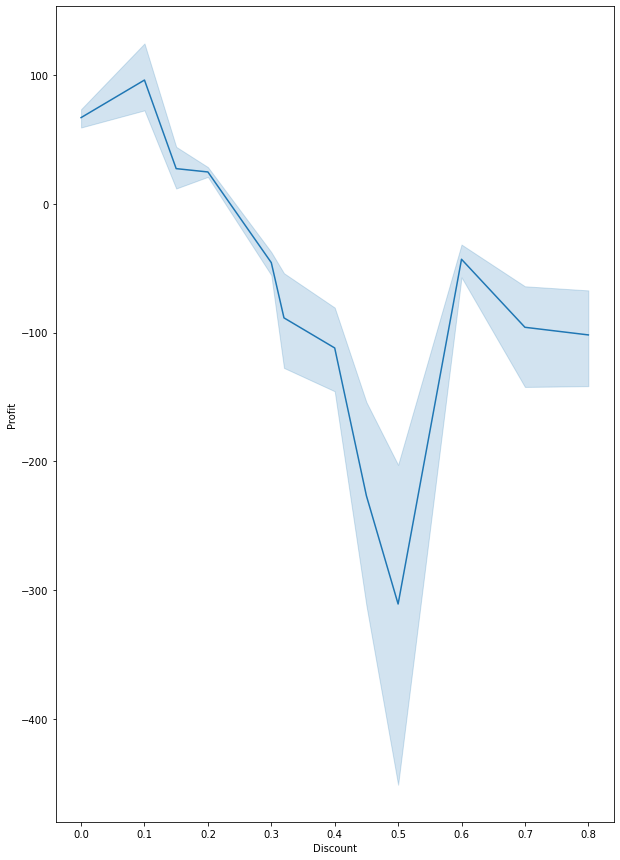

In [ ]:
#trend of profit wrt discount values
plt.figure(figsize=(10,15))
sns.lineplot(x= 'Discount',y= 'Profit',data=retail_data)
plt.show()

In [ ]:
#statewise profit
profit_sum = retail_data.groupby("State")["Profit"].sum()
profit_sum

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

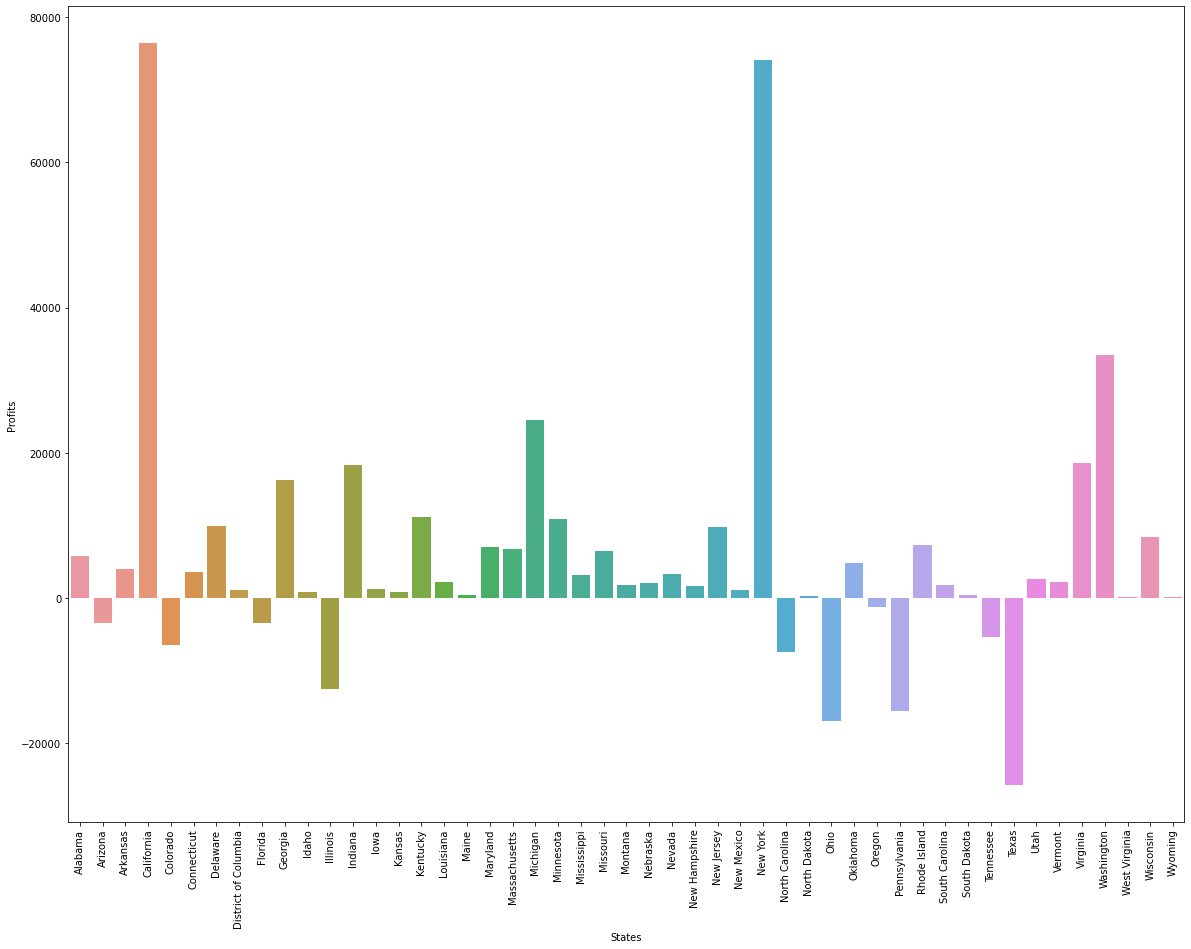

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x=profit_sum.index, y=profit_sum.values)
plt.xlabel("States")
plt.ylabel("Profits")
plt.xticks(rotation=90)
plt.show()

Highest Profit state is California.
Lowest Profit state is Texas.

In [ ]:
sales_sum= retail_data.groupby("State")["Sales"].sum()
sales_sum

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

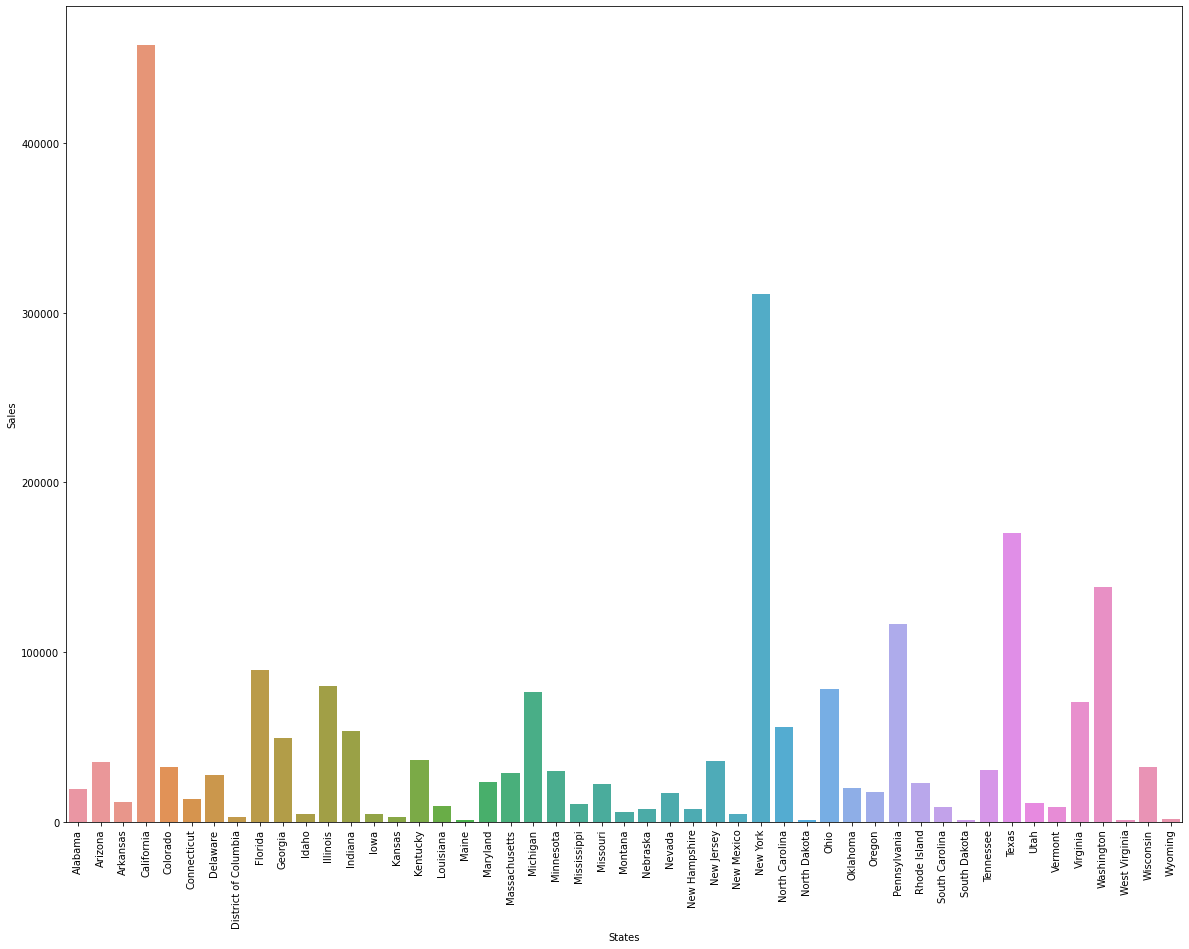

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x=sales_sum.index, y=sales_sum.values)
plt.xlabel("States")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

Highest Sales state is Calfornia.
Lowest Sales state is North Dakota.

<ipython-input-15-b080a2c2c30b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profits_sales = retail_data.groupby("State")["Profit","Sales"].sum()


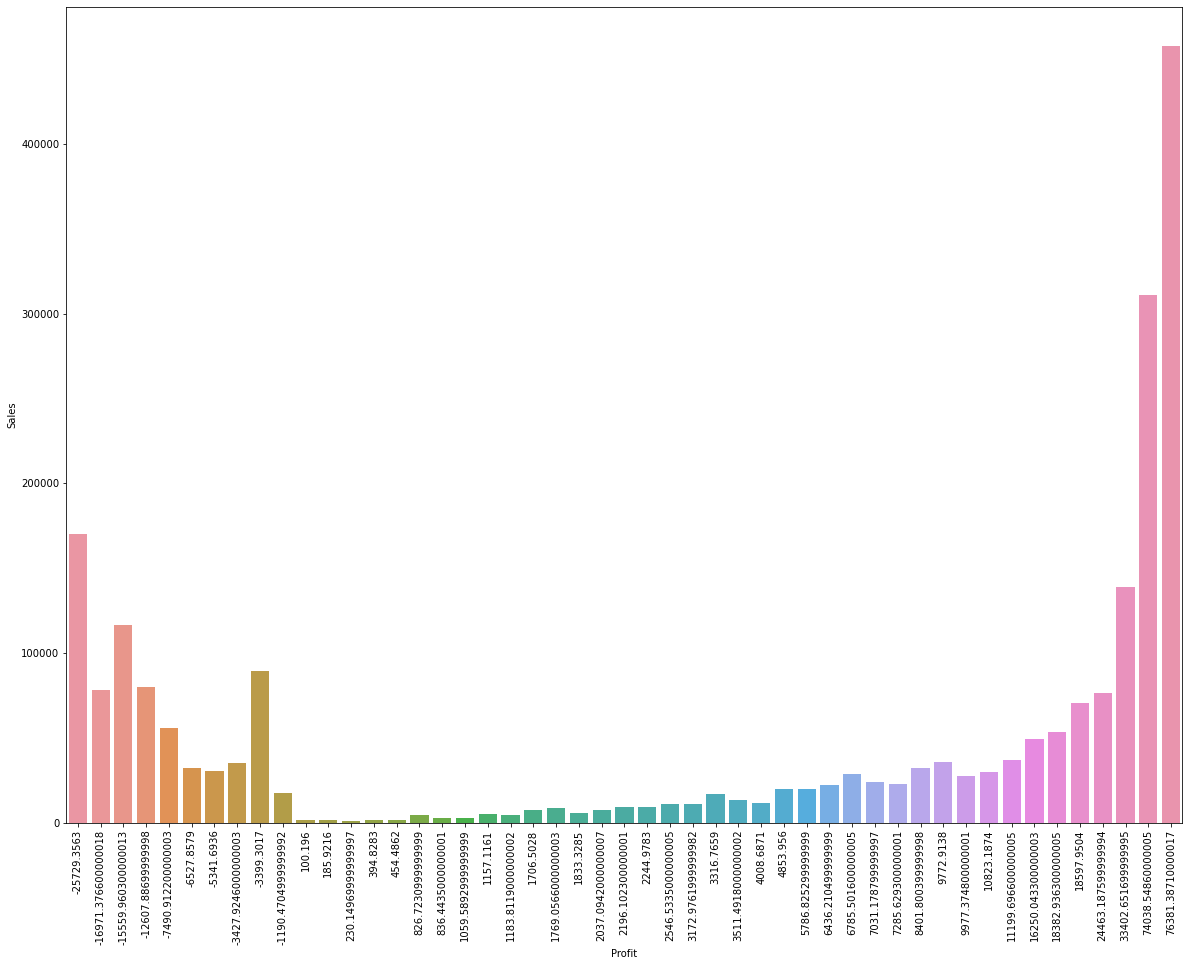

In [ ]:
#Comparing Profits and Sales of the states
profits_sales = retail_data.groupby("State")["Profit","Sales"].sum()
plt.figure(figsize=(20,15))
sns.barplot(x=profit_sum,y=sales_sum)
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-5b06a9beb071>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profits_sales = retail_data.groupby("State")["Profit","Sales"].sum()


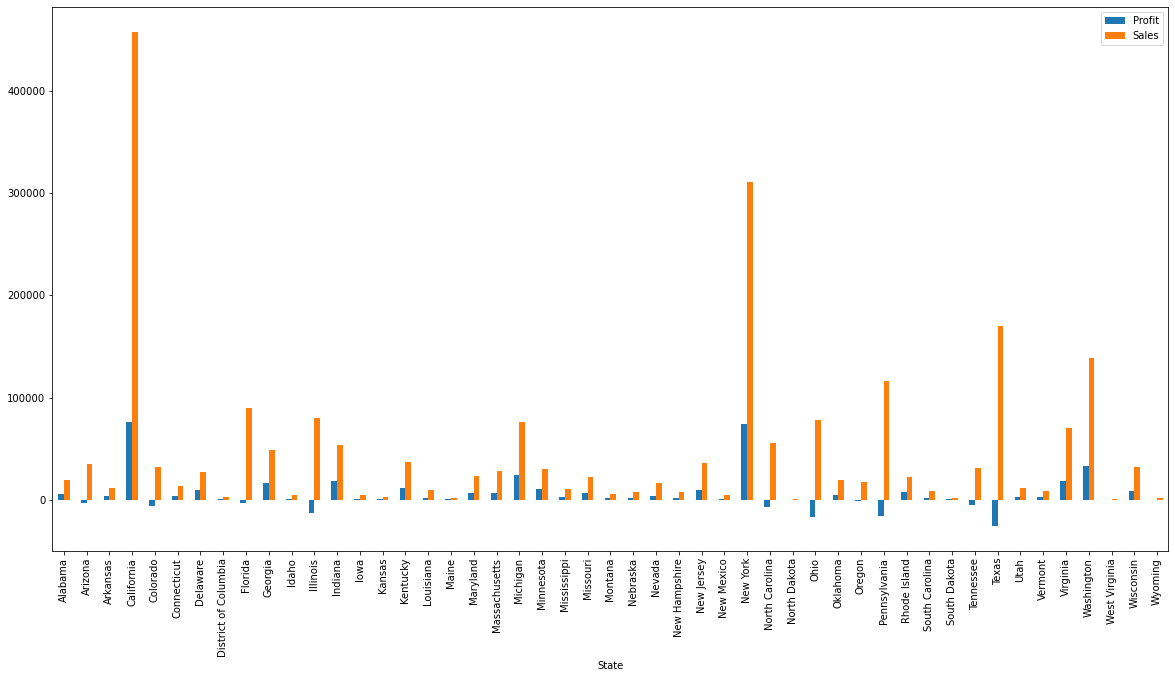

In [ ]:
#Comparing Profits and Sales of the states
profits_sales = retail_data.groupby("State")["Profit","Sales"].sum()
profits_sales.plot.bar(figsize=(20,10))
plt.show()

California has highest sales and highest profit.
Texas, Ohio and Pennsylvania have high sales but are still in loss.

In [ ]:
#Average discount percent of each state
avg_discount_percent = retail_data.groupby("State")["Discount"].mean()*100
avg_discount_percent

State
Alabama                  0.000000
Arizona                 30.357143
Arkansas                 0.000000
California               7.276362
Colorado                31.648352
Connecticut              0.731707
Delaware                 0.625000
District of Columbia     0.000000
Florida                 29.934726
Georgia                  0.000000
Idaho                    8.571429
Illinois                39.004065
Indiana                  0.000000
Iowa                     0.000000
Kansas                   0.000000
Kentucky                 0.000000
Louisiana                0.000000
Maine                    0.000000
Maryland                 0.571429
Massachusetts            1.555556
Michigan                 0.705882
Minnesota                0.000000
Mississippi              0.000000
Missouri                 0.000000
Montana                  6.666667
Nebraska                 0.000000
Nevada                   6.153846
New Hampshire            1.111111
New Jersey               0.461538
New Mexi

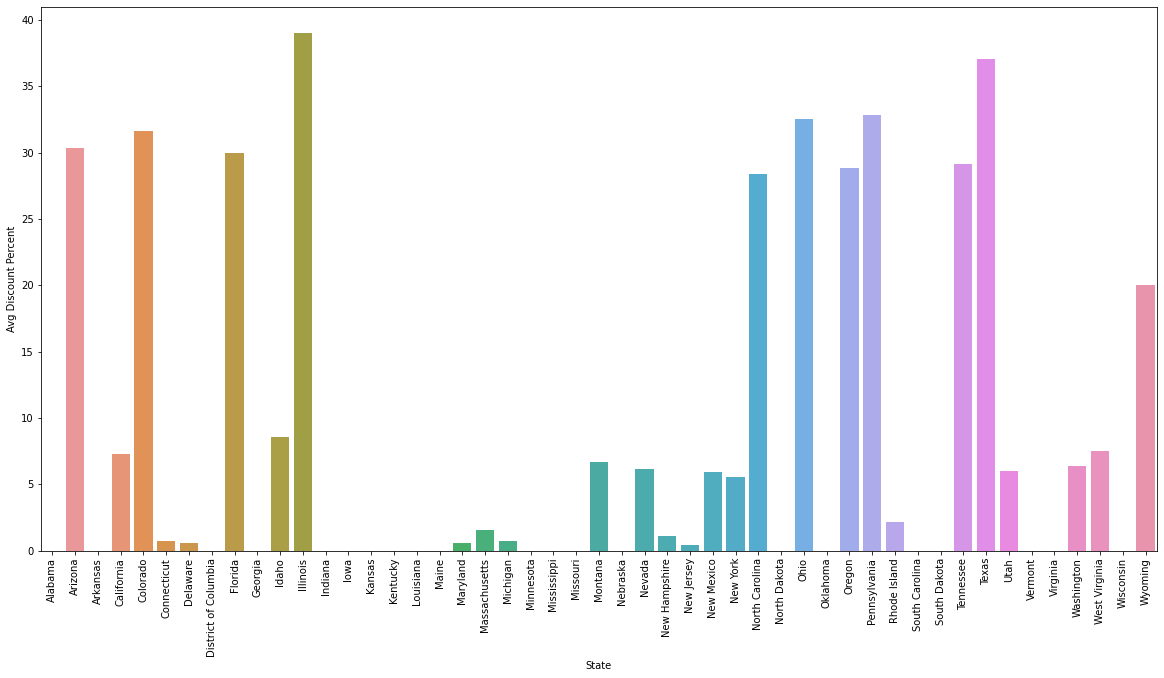

In [ ]:
#plotting avg discount percent of each state
plt.figure(figsize=(20,10))
sns.barplot(x=avg_discount_percent.index,y=avg_discount_percent.values)
plt.ylabel("Avg Discount Percent")
plt.xticks(rotation=90)
plt.show()

Illnois has highest Avg discount percent.

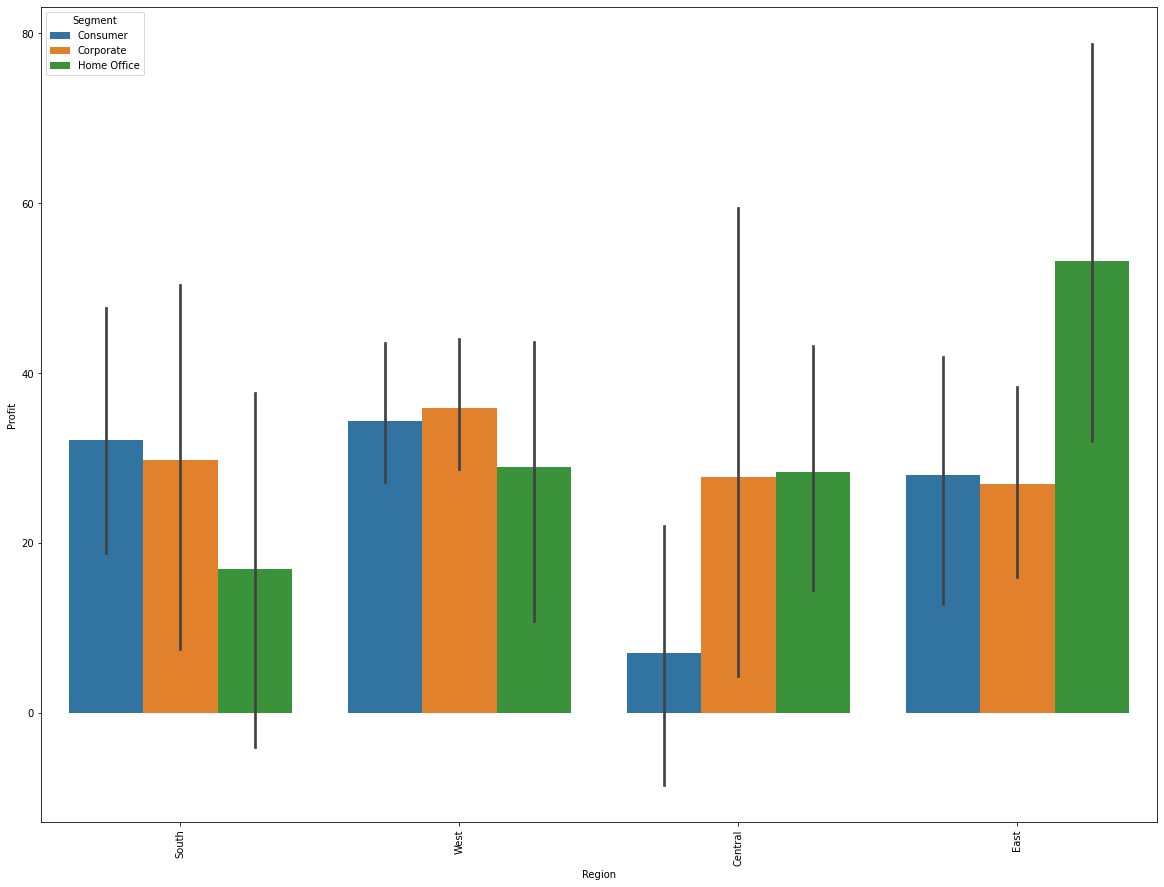

In [ ]:
# 
plt.figure(figsize=(20,15))
sns.barplot(data= retail_data, x="Region", y="Profit",hue="Segment")
plt.xticks(rotation=90)
plt.show()

Max profits through Home Office is in East Region and min is in South Region.



In [ ]:
category_data = retail_data.groupby(['Category'])[['Sales','Discount','Profit']].mean()
category_data

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


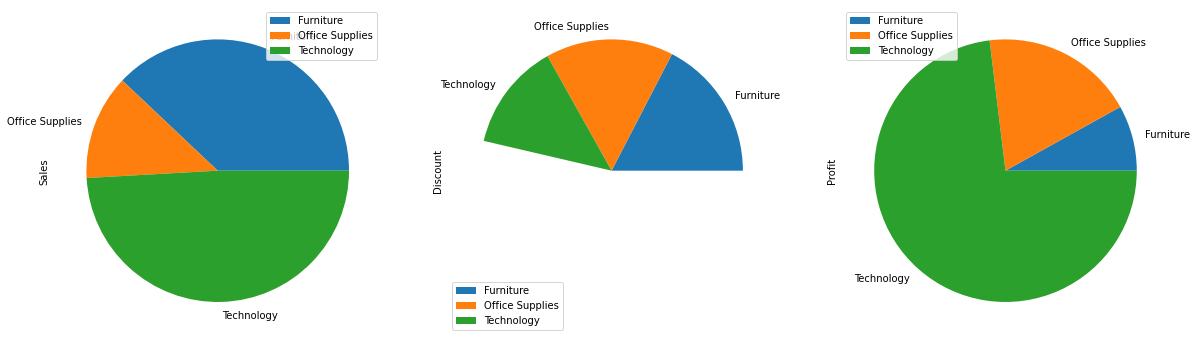

In [ ]:
#pie chart of category wise sales , profits and discount
category_data.plot.pie(subplots=True, figsize=(20,15), labels = category_data.index)
plt.show()

We can see Technology category has maximum Sales & Profit.
Office supplies category has minimum Sales and Furniture category has lowest Profit.

In [ ]:
shipmode_data = retail_data.groupby(["Ship Mode"])[["Sales", "Discount", "Profit"]].mean()
shipmode_data

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


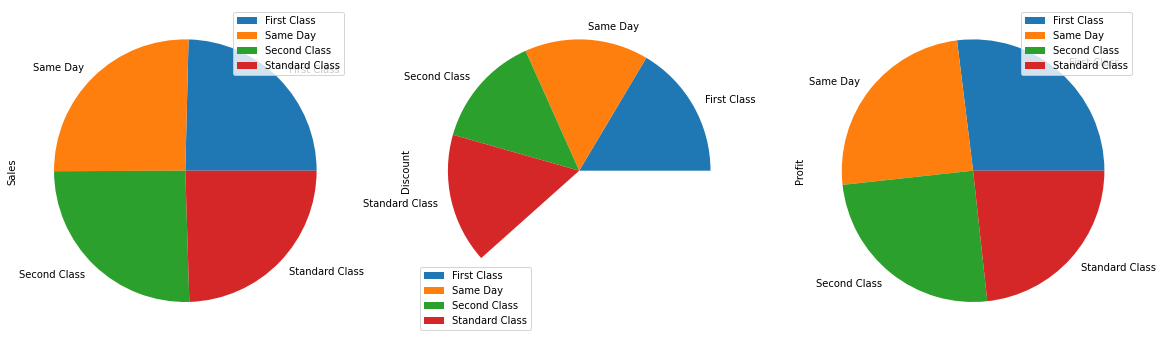

In [ ]:
shipmode_data.plot.pie(subplots=True, figsize=(20,15),labels=shipmode_data.index)
plt.show()

Same Day Ship Mode has highest sales.
First Class Ship Mode has highest profit and discount.
Standard Ship Mode has lowest Sales and Profit.

In [ ]:
subcategory_data = retail_data.groupby(["Sub-Category"])[["Profit","Sales"]].mean()
subcategory_data

,Profit,Sales
Sub-Category,,
Accessories,54.111788,215.974604
Appliances,38.922758,230.755710
Art,8.200737,34.068834
Binders,19.843574,133.560560
Bookcases,-15.230509,503.859633
Chairs,43.095894,532.332420
Copiers,817.909190,2198.941618
Envelopes,27.418019,64.867724
Fasteners,4.375660,13.936774


In [5]:
subcategory_data.plot.bar(figsize=(20,15))
plt.show()

NameError: ignored

We can see that Copiers have highest Sales and Profit, whereas Tables have lowest Profit and Fasteners have lowest Sales.

**SOLUTION:**


1. Top 4 profit making states are:- California, New York, Washington and Michigan.
Top 4 loss making states are:- Illinois, Pennsylvania, Ohio and Texas.
We can increase and descrease the sales in the states respectively. 

2. Top 4 states with max sales are:- California, NewYork, Texas and Washington.
Top 4 states with min sales are:- North Dakota, Maine, West Virginia and South Dakota.
To make more more profit we have to increase sales in the states with min sales.

3. We observe that states like Texas, Pennsylvania and Ohio give more discount that is why the sales are high while the store faces loss.
We need to reduce the discount percentage in these states.

4. Top profit making segment for each region are:
* South -> Consumer
* West -> Corporate
* Central -> Home Office
* East -> Home Office
We can increase the sales of the particular segment in the respective region.

5. Top loss making segment for each region are:
* South -> Home Office
* West -> Home Office
* Central -> Consumer
* East -> Corporate
We can focus on strategies to increase profit from these segments in the respective region.

6. Technology Category has max sales & profit because it has lowest discount percent.
Office Supplies Category has min sales & Furniture Category has min profit. 
We have to focus on increasing sales & profit from Office Suplies & Furniture Category.

7. We observe that Same Day Ship Mode has highest sales.
First Class Ship Mode has highest profit & discount.
And, Standard Ship Mode has lowest sales and profit.
So, we should prefer Same Day & First Class Ship Mode for better sales & profit and avoid Standard Ship Mode.

8. Higest profit making Sub-Category is Copiers whereas Lowest profit making Sub-Category is Tables.
Therefore, we should increase the sales of Copiers and focus on improving profits from Tables.

9. Sub-Categories with highest sales are Copiers and Machines whereas Sub-Categories with lowest sales are Fasteners, Labels, Paper and Art.
We also notice, Machines have high sales due to large discount percent but it makes less profit.
We can work on increasing the sales of Sub-Cateogy items with lowest sales.



**THE END**

---

